<a href="https://colab.research.google.com/github/dibend/Colab/blob/main/Stock_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://deephaven.io/blog/2022/04/25/yfinance/">Starting Point</a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enter a time period:
Valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max6mo
Enter an interval:
Valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo1d
Enter a ticker or list of tickers seperated by commas with no spaces:BRK-B,VOO,QQQ
[*********************100%***********************]  1 of 1 completed


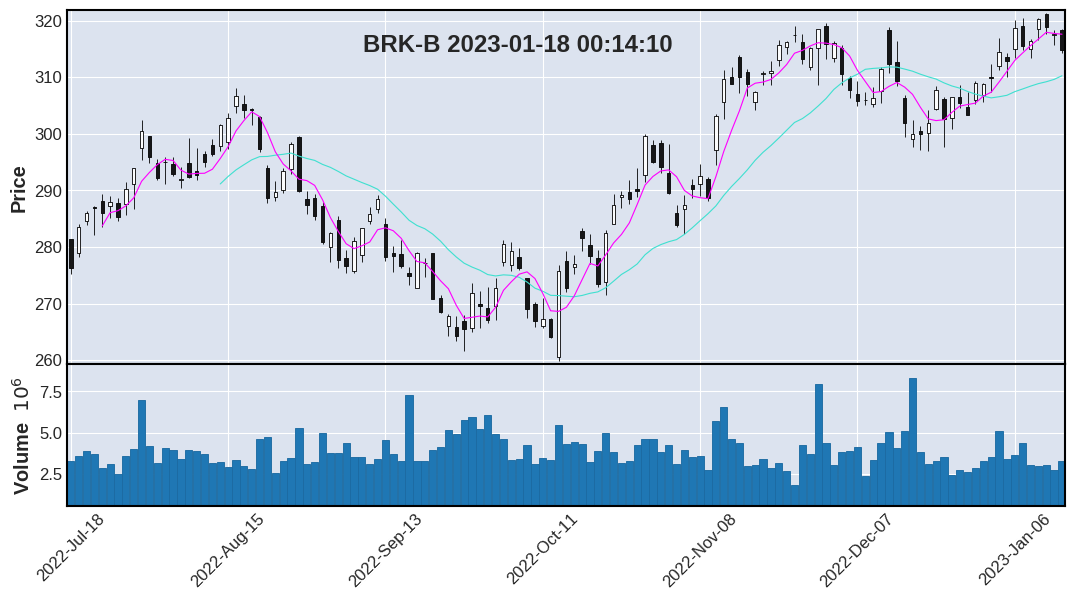

[*********************100%***********************]  1 of 1 completed


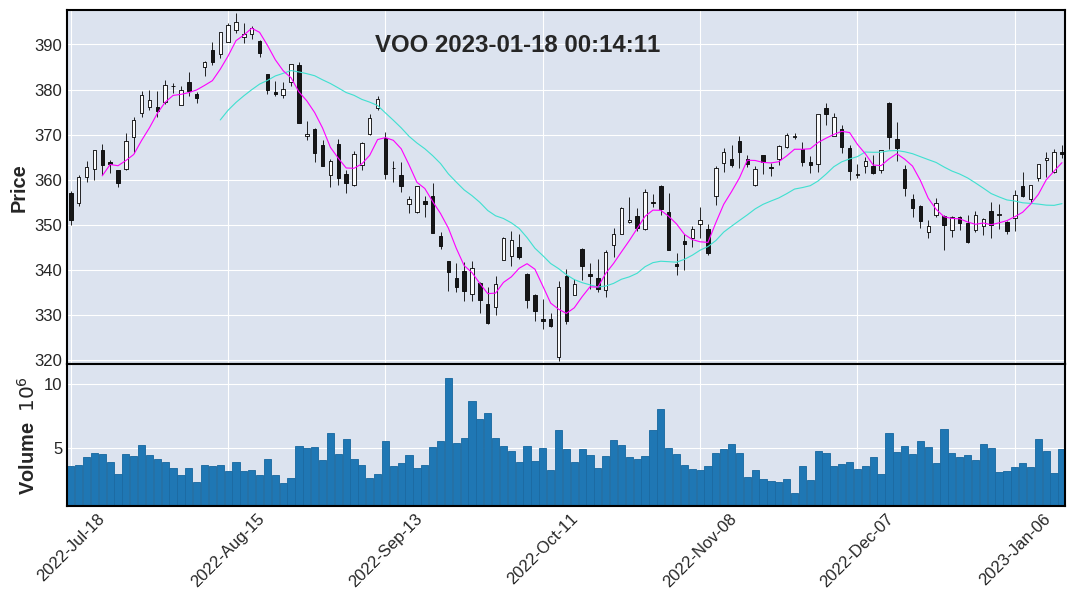

[*********************100%***********************]  1 of 1 completed


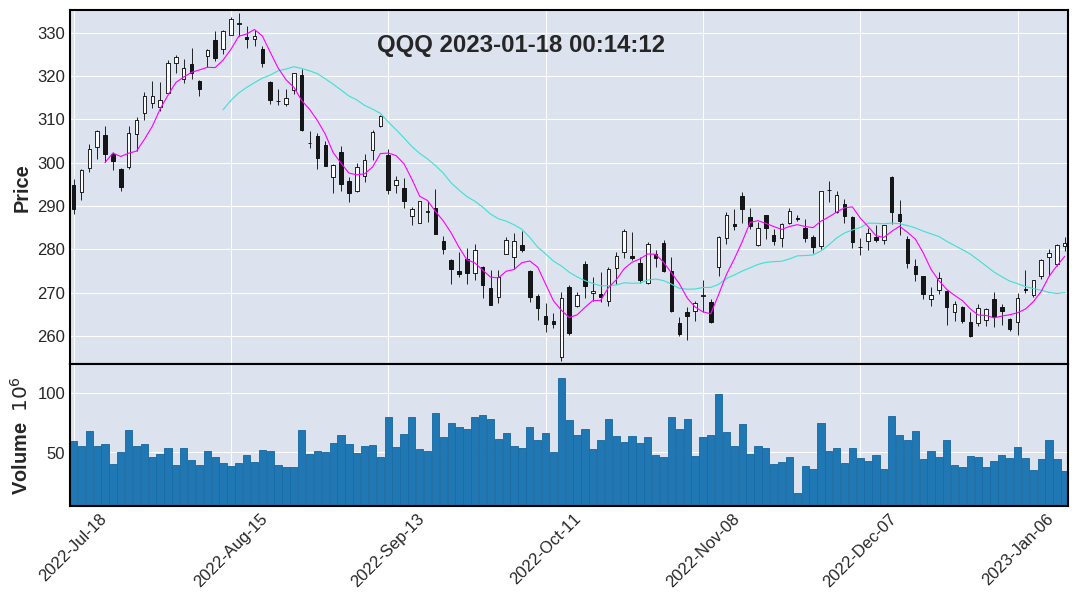

In [14]:
# imports and installs
!pip install yfinance
!pip install mplfinance
import datetime
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
period = input('Enter a time period:\nValid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max')

# valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
interval = input('Enter an interval:\nValid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo')

# the stocks you want to plot
stocks = input('Enter a ticker or list of tickers seperated by commas with no spaces:').split(',')

# method to grab data and plot the data
def plot_stocks_df(stocks, period='1d' , interval=interval):
  for stock in stocks:
    hist = yf.download(tickers=stock, period=period, interval=interval)
    mpf.plot(hist, type='candle',
      volume=True, mav=(20,5),title = stock+" "+datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
      tight_layout=True, figratio=(10,5))

# call the method
plot_stocks_df(stocks, period, interval)